# Exercise 10

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercice 13.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
bikes.groupby('workingday').total.std()

workingday
0    173.723919
1    184.512872
Name: total, dtype: float64

Se puede observar que la demanda total de bicicletas entre días hábiles y fines de semana incluyendo festivos es similar entre el  promedio solicitado y la dispersión observada durante cada una de las horas del día, dado que la diferencia durante cada uno de estos días es de tan solo 5 unidades con una variación de 184 y 173 bicicletas respectivamente.

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Se observa que la mayor demanda de bicicletas durante un día se presenta a las 8 am y en la tarde es entre las 5 y 6 pm, de igual manera podemos notar que este tipo de solicitudes se reduce bastante a la madrugada, es decir entre la 12 am y las 6 am. De igual manera se ve que durante el día Sin embargo las solicitudes de bicicletas entre las 7 am y las 8 pm no es menor de 200 unidades exceptuando el horario de 10 am en donde la cantidad de solicitudes disminuye levemente con respecto al comprtamiento mencionado. 

# Exercice 13.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

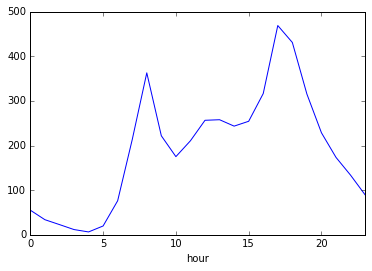

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

In [11]:
day_0=bikes.loc[bikes.workingday==0]
day_1=bikes.loc[bikes.workingday==1]

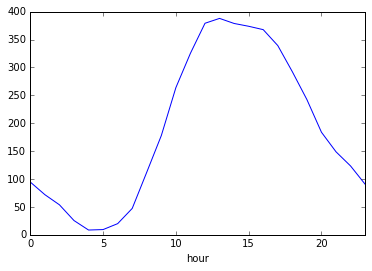

In [12]:
day_0.groupby('hour').total.mean().plot()

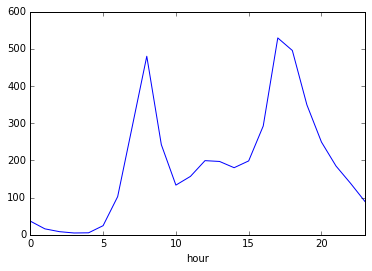

In [13]:
day_1.groupby('hour').total.mean().plot()

Write about your findings

Se nota que durante los días hábiles se prentan picos a las 8 am y entre las 5 pm y 6 pm en cuanto a la demanda de bicicletas se refiere, este comportamiento es similar al que se observa durante el analisis conjunto de dias hábiles y festivos, de igual manera se puede afirmar que durante los fines de semana y dias festivos la demanda de bicicletas alcanza su punto mas alto a medio dia y apartir de las 4 pm la cantidad de bicicletas solicitadas disminuye. 

# Exercice 13.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
feature_cols = ['hour','workingday']
X = bikes[feature_cols]
y = bikes.total
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123)

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
linreg.intercept_, linreg.coef_


(64.557380983502284, array([ 10.62746196,   7.23758038]))

In [27]:
day_1.groupby('hour').total.mean()

hour
0      36.732258
1      16.003236
2       8.436066
3       4.892734
4       5.363636
5      24.529032
6     102.577419
7     290.690323
8     479.945161
9     242.293548
10    133.596774
11    157.019355
12    199.347267
13    197.160772
14    180.366559
15    198.627010
16    292.466238
17    529.209003
18    495.485531
19    349.282958
20    249.363344
21    184.855305
22    138.344051
23     88.996785
Name: total, dtype: float64

De acuerdo a los coeficientes obtenidos por el modelo de regresión lineal se podria afirmar que durante un dia hábil a media noche la solicitud de bicicletas seria de 72 bicicletas aproximadamente, y este valor incrementaria en 10 unidades a medida que pasan las horas, sin embargo esta afirmación no es del todo cierta ya que de acuerdo a la descripciòn de los datos durante el fin de semana se puede ver que despues de las 12 am la demanda de bicicletas disminuye contradiciendo lo que se estima en el modelo, este error se presenta debido a que este comportamiento no es lineal como se asume en el modelo anterior.

# Exercice 13.4

Use 10-fold cross-validation to calculate the RMSE for the linear regression model.

In [46]:
from sklearn import cross_validation, linear_model
from sklearn import metrics
import numpy as np

y_pred = cross_validation.cross_val_predict(linreg, X_test, y_test, cv=10)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 165.7474388


# Exercice 13.5

Use 10-fold cross-validation to evaluate a decision tree model with those same features

In [59]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [67]:
import numpy as np
from sklearn import metrics
from sklearn import cross_validation

y_pred = cross_validation.cross_val_predict(treereg, X_test, y_test, cv=10)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 110.198292804


# Exercice 13.6

Select the max_depth that minimizes the RMSE

In [69]:
# list of values to try
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

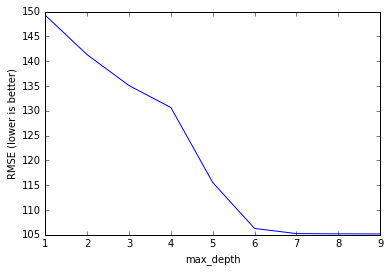

In [70]:
# plot max_depth (x-axis) versus RMSE (y-axis)
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [71]:
# max_depth=7 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [72]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

105.26224754923639

# Exercice 13.7 (2 points)

Fit a decision tree model to the entire dataset using "max_depth=3", and create a tree diagram using Graphviz. Then, figure out what each leaf represents. What did the decision tree learn that a linear regression model could not learn?

In [77]:
# define X and y
feature_cols = ['workingday','hour']
X = bikes[feature_cols]
y = bikes.total

In [78]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [79]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_bikes.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_titanic.dot -o tree_titanic.png

In [80]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,workingday,0.090168
1,hour,0.909832


### TREE

In [81]:
# before splitting anything, just predict the mean of the entire dataset
bikes['prediction'] = bikes.total.mean()
bikes.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction
datetime,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0,3,13,16,0,191.574132


In [113]:
hour = 7
bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()

(((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5

150.22560060405686

In [114]:
bikes_izq = bikes.loc[bikes.hour <7].copy()

In [115]:
bikes_izq.hour.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [116]:
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday<workingday, 'total'].mean()
    bikes.loc[bikes.workingday>=workingday, 'pred'] = bikes.loc[bikes.workingday>=workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [117]:
def error_hour(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [118]:
bikes_izq = bikes.loc[bikes.hour<7].copy()

for hour in bikes_izq.hour.unique():
    print(hour)
    error_hour(bikes_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_izq, workingday)

0
39.56714516247788
1
38.46175887834954
2
38.827302356307555
3
39.34538405588436
4
39.534113157382144
5
38.30948200125475
6
35.24426946227024
0
39.56714516247788
1
39.18093811435608


In [119]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.hour<6].copy()

In [125]:
for hour in bikes_izq_izq.hour.unique():
    print(hour)
    error_hour(bikes_izq_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_hour(bikes_izq_izq,workingday)

0
30.753540668567577
1
27.614237275202125
2
27.46590337533093
3
28.171307299972213
4
29.557984864071205
5
30.657024737799514
0
30.753540668567577
1
27.614237275202125


In [123]:
bikes_izq_izq_izq = bikes_izq_izq.loc[bikes_izq_izq.hour<2].copy()

In [126]:
for hour in bikes_izq_izq_izq.hour.unique():
    print(hour)
    error_hour(bikes_izq_izq_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_hour(bikes_izq_izq_izq,workingday)

0
40.538959119681785
1
39.117819478677326
0
40.538959119681785
1
39.117819478677326


In [128]:
bikes_izq_der = bikes_izq.loc[bikes_izq.hour>=6].copy()

In [130]:
for hour in bikes_izq_der.hour.unique():
    print(hour)
    error_hour(bikes_izq_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_hour(bikes_izq_der,workingday)

6
54.68514067417475
0
54.68514067417475
1
54.68514067417475


In [131]:
bikes_izq_izq_der = bikes_izq_izq.loc[bikes_izq_izq.hour>=2].copy()

In [133]:
for hour in bikes_izq_izq_der.hour.unique():
    print(hour)
    error_hour(bikes_izq_izq_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_hour(bikes_izq_izq_der,workingday)

2
17.29426553034504
3
16.717555760255358
4
17.162529778774573
5
17.093928272746314
0
17.29426553034504
1
17.29426553034504


In [140]:
bikes_der = bikes.loc[bikes.hour >7].copy()

In [136]:
bikes_der.hour.unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [137]:
bikes_der = bikes.loc[bikes.hour>7].copy()

for hour in bikes_der.hour.unique():
    print(hour)
    error_hour(bikes_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der, workingday)

8
176.965398831481
9
174.91597595994776
10
176.5099013799444
11
176.94601620269356
12
176.721870492827
13
176.7384210016527
14
176.75182711705142
15
176.65947480193157
16
176.6315091259541
17
176.9271805142688
18
175.41594675786118
19
170.4346481459485
20
166.7843508707728
21
166.1935377429122
22
167.99524344379407
23
171.48731600968821
0
176.965398831481
1
176.9536012177479


In [143]:
bikes_der_izq = bikes_der.loc[bikes_der.hour <21].copy()

In [145]:
bikes_der_izq = bikes_der.loc[bikes_der.hour<21].copy()

for hour in bikes_der_izq.hour.unique():
    print(hour)
    error_hour(bikes_der_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_izq, workingday)

8
180.4392695050326
9
179.1419364578582
10
180.4295918036737
11
179.43899450573863
12
177.8986508473656
13
177.28632864547234
14
176.51693748673182
15
174.92265718866366
16
173.17579329186609
17
173.7518519575783
18
179.29677266732494
19
180.31030270503118
20
179.62287353710994
0
180.4392695050326
1
180.38860207201742


In [146]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour <16].copy()

In [147]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour<16].copy()

for hour in bikes_der_izq_izq.hour.unique():
    print(hour)
    error_hour(bikes_der_izq_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_izq_izq, workingday)

8
156.00650261573813
9
149.84031727976802
10
153.8819617348975
11
155.95022621053423
12
155.91931126972358
13
155.97501287595557
14
156.00527615529495
15
155.98714283821715
0
156.00650261573813
1
151.89876993401364


In [148]:
bikes_der_izq_der = bikes_der_izq.loc[bikes_der_izq.hour >=16].copy()

In [149]:
bikes_der_izq_der = bikes_der_izq.loc[bikes_der_izq.hour>=16].copy()

for hour in bikes_der_izq_der.hour.unique():
    print(hour)
    error_hour(bikes_der_izq_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_izq_der, workingday)

16
197.5420520682468
17
196.7390965483207
18
194.73930688134794
19
186.41275084200575
20
187.65241308990824
0
197.5420520682468
1
192.18389017185376


In [150]:
bikes_der_der = bikes_der.loc[bikes_der.hour >=21].copy()

In [151]:
bikes_der_der = bikes_der.loc[bikes_der.hour>=21].copy()

for hour in bikes_der_der.hour.unique():
    print(hour)
    error_hour(bikes_der_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_der, workingday)

21
78.9719321218757
22
73.39673643923476
23
72.98864033487493
0
78.9719321218757
1
78.59722825511945


In [152]:
bikes_der_der_izq = bikes_der_der.loc[bikes_der_der.hour<23].copy()

In [153]:
bikes_der_der_izq = bikes_der_der.loc[bikes_der_der.hour<23].copy()

for hour in bikes_der_der_izq.hour.unique():
    print(hour)
    error_hour(bikes_der_der_izq, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_der_izq, workingday)

21
81.61307789146191
22
79.15053168788128
0
81.61307789146191
1
80.74074370646522


In [154]:
bikes_der_der_der = bikes_der_der.loc[bikes_der_der.hour>=23].copy()

In [155]:
bikes_der_der_der = bikes_der_der.loc[bikes_der_der.hour>=23].copy()

for hour in bikes_der_der_der.hour.unique():
    print(hour)
    error_hour(bikes_der_der_der, hour)

for workingday in [0, 1]:
    print(workingday)
    error_workingday(bikes_der_der_der, workingday)

23
51.5813521339401
0
51.5813521339401
1
51.57590195076688
